In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.inspection import DecisionBoundaryDisplay


In [7]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=0)
data_frame_1 = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=1)

No handles with labels found to put in legend.


Intercept = 0.02479
Coefficient = 0.00140
The coefficient is 0.00140
The MSE is 0.00215
The coefficient of determination is 0.59488 (if 1 perfect prediction)
The Pearson correlation coefficient is 0.8. 


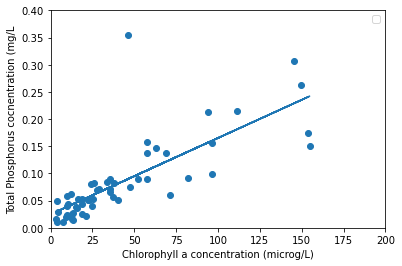

In [4]:
x = data_frame['Chlaμgl'].values.reshape(-1,1)
y = data_frame['TPmgl'].values
plt.scatter(x,y)
plt.xlim(0,200)
plt.ylim(0,0.4)
plt.xlabel('Chlorophyll a concentration (microg/L)')
plt.ylabel('Total Phosphorus cocnentration (mg/L')
model = LinearRegression()
model.fit(x, y)

y_predicted = model.predict(x)
print('Intercept = %0.5f\nCoefficient = %0.5f' % (model.intercept_, model.coef_))
plt.plot(x, y_predicted)
plt.legend()

Pearson_correlation = np.corrcoef(x.reshape(-1),y)[0,1]
MSE = mean_squared_error(y, y_predicted)
R2SCORE = r2_score(y, y_predicted)
COEFFICIENT = model.coef_
print("The coefficient is %.5f\nThe MSE is %.5f\nThe coefficient of determination is %.5f (if 1 perfect prediction)\nThe Pearson correlation coefficient is %.1f. "%(COEFFICIENT, MSE, R2SCORE, Pearson_correlation))






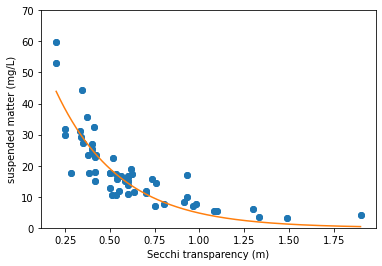

In [5]:
x = data_frame['Transparencym'].values
y = data_frame['SPMmgL'].values
plt.scatter(x,y)
plt.ylim(0,70)
plt.xlabel('Secchi transparency (m)')
plt.ylabel('suspended matter (mg/L)')

def model(z, a, b):
    return a * np.exp(-b * z)

popt, pcov = curve_fit(model, x, y, p0=(5, 0.1))

xx = np.linspace(min(x), max(x), 1000)
yy = model(xx, *popt)
plt.plot(x, y, 'o', xx, yy)


# y_predicted = model.predict(x)
# print('Intercept = %0.5f\nCoefficient = %0.5f' % (model.intercept_, model.coef_))
# plt.plot(x, y_predicted)
# plt.legend()

# Pearson_correlation = np.corrcoef(x.reshape(-1),y)[0,1]

# MSE = mean_squared_error(y, y_predicted)
# R2SCORE = r2_score(y, y_predicted)
# COEFFICIENT = model.coef_
# print("The coefficient is %.5f\nThe MSE is %.5f\nThe coefficient of determination (if 1 perfect prediction) is %.5f\nThe Pearson correlation coefficient is %.1f. "%(COEFFICIENT, MSE, R2SCORE, Pearson_correlation))


In [95]:
data_for_color_pred = pd.DataFrame(data_frame_1[['Colour1', 'Nitrate_mg/L','Phosphate mg/L']]).head(100)
data_for_color_pred.dropna(inplace=True)
X = data_for_color_pred[['Nitrate_mg/L','Phosphate mg/L']]
y = data_for_color_pred['Colour1']

In [96]:
colorato = data_for_color_pred.loc[data_for_color_pred['Colour1']==1]
non_colorato = data_for_color_pred.loc[data_for_color_pred['Colour1']==0]

In [104]:
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
intercept = model.intercept_
print(intercept)
print(parameters)
parameters = np.squeeze(model.coef_, axis=0)
# x_values = [np.min(X[0]-5), np.max(X[1]+5)]
x_values = np.linspace(0,0.1, 1000)
y_values = -(intercept[0]+np.dot(parameters[-1], x_values))/parameters[-2]

[0.63329351]
[[-0.07405258  0.4397617 ]]


<AxesSubplot:xlabel='Nitrate_mg/L', ylabel='Phosphate mg/L'>

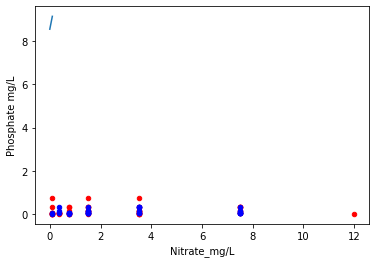

In [105]:
fig, ax = plt.subplots()
ax.plot(x_values, y_values, label='Decision Boundary')
colorato.plot(x='Nitrate_mg/L', y='Phosphate mg/L', kind='scatter', c='red', ax=ax)
non_colorato.plot(x='Nitrate_mg/L', y='Phosphate mg/L', kind='scatter', c='blue', ax=ax)

(0.0, 180.0)

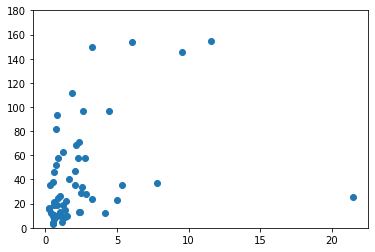

In [45]:
data_frame.keys()
x = data_frame['PCugL'].values
y = data_frame['Chlaμgl'].values
plt.scatter(x,y)
plt.ylim(0,180)
# plt.xlim(0,0.4)
# plt.xlabel('Secchi transparency (m)')
# plt.ylabel('suspended matter (mg/L)')

In [32]:
data_frame.keys()

Index(['lake', '04Long.', '04Lat.', 'Temperature', 'Depth /m', 'Area /km2',
       'area/depth', 'p_cult', 'p_past', 'p-rice', 'p-urban', 'p_irrig',
       'pdens', 'Chlaμgl', 'SPMmgL', 'SPIM', 'SPOM', 'SPOMSPM', 'SPOMSPIM',
       'PCugL', 'PCChla', 'DOCmgL', 'POCµgl', 'DOC_POC', 'TPmgl',
       'Transparencym', 'Chla/POC', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')